In [1]:
import pandas as pd
import numpy as np
import random
import copy as cp

In [2]:
data_frame = pd.read_csv('influencers.csv')
data_inf =[]

for i in range(len(data_frame)):
    data_inf.append([data_frame['id'][i],data_frame['followerCount'][i],data_frame['engagementRate'][i]])


In [3]:
#MELIHAT KEBERAGAMAN DATA
def sortingeuy(elem):
    return elem[1]
data_sorting = cp.deepcopy(data_inf)
data_sorting.sort(key=sortingeuy, reverse = True)


# Membership Functions

In [4]:
#FOLLOWERS
def follower_high(x):
    if x<=50000:
        return 0
    elif x>90000:
        return 1
    else:
        return (x-50000)/(90000-50000)

def follower_low(x):
    if x<=20000:
        return 1
    elif x>25000:
        return 0
    else:
        return (25000-x)/(25000-20000)

def follower_avg(x):
    if x<=20000 or x>90000:
        return 0
    elif x>20000 and x<=30000:
        return (x-20000)/(30000-20000)
    elif x>30000 and x<=45000:
        return 1
    else:
        return (90000-x)/(90000-45000)

#ENGAGEMENTS

def engage_high(x):
    if x<=6:
        return 0
    elif x>9:
        return 1
    else:
        return (x-6)/(9-6)

def engage_low(x):
    if x<=2:
        return 1
    elif x>2.5:
        return 0
    else:
        return (2.5-x)/(2.5-2)

def engage_avg(x):
    if x<=2 or x>9:
        return 0
    elif x>2 and x<=3:
        return (x-2)/(3-2)
    elif x>3 and x<=5.5:
        return 1
    else:
        return (9-x)/(9-5.5)
    

# MEMBUAT GRAFIK MEMBERSHIP FUNCTION DENGAN MATPLOTLIB

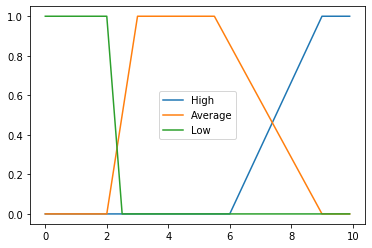

In [10]:
#GRAFIK ENGAGEMENT
import matplotlib.pyplot as plt
x = np.arange(0,10,0.1)
plt.plot(x,[engage_high(itt) for itt in x], label='High')
plt.plot(x,[engage_avg(itt) for itt in x], label='Average')
plt.plot(x,[engage_low(itt) for itt in x], label='Low')
plt.legend()

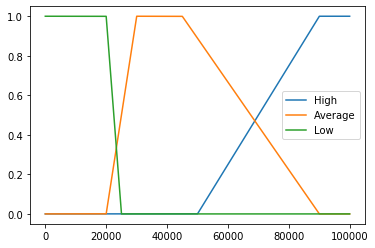

In [12]:
#GRAFIKFOLLOWER
y = np.arange(0,100000,1)
plt.plot(y,[follower_high(itt) for itt in y], label='High')
plt.plot(y,[follower_avg(itt) for itt in y], label='Average')
plt.plot(y,[follower_low(itt) for itt in y], label='Low')
plt.legend()

# FUZZIFIKASI

In [11]:
#FUZZIFIKASI SESUAI BATASAN YANG TELAH DIBUAT DI MEMBERSHIP FUNCTION
data_fol = []
data_eng = []
for i in range(len(data_inf)):
    data_fol.append([data_inf[i][0],follower_high(data_inf[i][1]),follower_low(data_inf[i][1]),follower_avg(data_inf[i][1])])
    data_eng.append([data_inf[i][0],engage_high(data_inf[i][2]),engage_low(data_inf[i][2]),engage_avg(data_inf[i][2])])


# INFERENCE

| FOLLOWERS | ENGAGEMENT RATE | SCORE |
| --- | --- | --- |
| HIGH | HIGH | ACCEPTED  |
| HIGH | AVERAGE | ACCEPTED |
| HIGH | LOW | CONSIDERED |
| AVERAGE | HIGH | ACCEPTED |
| AVERAGE | AVERAGE | CONSIDERED |
| AVERAGE | LOW | REJECTED |
| LOW | HIGH | ACCEPTED |
| LOW | AVERAGE | CONSIDERED |
| LOW | LOW | REJECTED |

In [26]:
print(data_fol[12][1])
print(data_eng[12][1])
np.min([data_fol[12][1],data_eng[12][1]])
#= [indeks,high,low,average]

1
0.2333333333333334


0.2333333333333334

In [14]:
#MENCARI DATA INFERENCE DAN MEMASUKKANNYA KE ARRAY 
data_inference = []
for i in range(len(data_inf)):
    tampacc = []
    tamprej = []
    tampcon = []
    
    tampacc.append(np.min([data_fol[i][1],data_eng[i][1]]))
    tampacc.append(np.min([data_fol[i][1],data_eng[i][3]]))
    tampcon.append(np.min([data_fol[i][1],data_eng[i][2]]))
    
    tampacc.append(np.min([data_fol[i][3],data_eng[i][1]]))
    tampcon.append(np.min([data_fol[i][3],data_eng[i][3]]))
    tamprej.append(np.min([data_fol[i][3],data_eng[i][2]]))
    
    tampacc.append(np.min([data_fol[i][2],data_eng[i][1]]))
    tampcon.append(np.min([data_fol[i][2],data_eng[i][3]]))
    tamprej.append(np.min([data_fol[i][2],data_eng[i][2]]))
    
    val_acc = np.max(tampacc)
    val_rej = np.max(tamprej)
    val_con = np.max(tampcon)
    
    data_inference.append([data_inf[i][0],val_acc,val_rej,val_con])

# DEFUZZYFICATION SUGENO

In [36]:
data_defuzzy = []
for i in range(len(data_inf)):
    data_defuzzy.append([data_inf[i][0],((data_inference[i][1]*95)+(data_inference[i][2]*50)+(data_inference[i][3]*70))/(data_inference[i][1]+data_inference[i][2]+data_inference[i][3])])


In [38]:
data_defuzzy.sort(key=sortingeuy, reverse = True)#Fungsi ini digunakan untuk mensorting 20 terbaik sesuai dengan nilai terbesar
data_output = []
data_nilai = []
for i in range(20):
    data_output.append(data_defuzzy[i][0])
    data_nilai.append(data_defuzzy[i][1])
print('Maka 20 Orang Influencer Yang Terpilih Adalah',data_output)
print()
print('Dengan Nilai ', data_nilai)


Maka 20 Orang Influencer Yang Terpilih Adalah [11, 13, 39, 75, 41, 25, 72, 100, 59, 60, 48, 53, 74, 19, 61, 2, 5, 6, 8, 10]

Dengan Nilai  [95.0, 95.0, 95.0, 95.0, 90.40165213165903, 87.85642360861372, 77.77659779880285, 77.4468085106383, 76.55080213903743, 75.75717944111351, 74.72972972972973, 74.3150798297048, 74.02446877012234, 73.60935928933604, 72.57251290542816, 70.0, 70.0, 70.0, 70.0, 70.0]


In [11]:
#AKAN MENGHASILKAN FILE CSV KEDALAM FOLDER TEMPAT KODINGAN INI TERSIMPAN
hasil_bekerja_keras = np.asarray(data_output)
np.savetxt("hasil_bekerja_keras.csv", hasil_bekerja_keras, delimiter=",",fmt='%0.0f')